In [1]:
#first create data
import pandas as pd
import random

random.seed(42)

# Generate a sample dataset
n_customers = 500
customer_ids = range(1001, 1001 + n_customers)
ages = [random.randint(18, 70) for _ in range(n_customers)]
genders = ['Male', 'Female']
marital_statuses = ['Married', 'Single', 'Divorced']
annual_incomes = [random.randint(30000, 100000) for _ in range(n_customers)]
total_purchases = [random.randint(5, 50) for _ in range(n_customers)]
preferred_categories = ['Electronics', 'Appliances']

data = []
for _ in range(n_customers):
    customer_id = random.choice(customer_ids)
    age = random.choice(ages)
    gender = random.choice(genders)
    marital_status = random.choice(marital_statuses)
    annual_income = random.choice(annual_incomes)
    purchases = random.choice(total_purchases)
    preferred_category = random.choice(preferred_categories)
    data.append([customer_id, age, gender, marital_status, annual_income, purchases, preferred_category])

# Create a DataFrame
columns = ['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'AnnualIncome (USD)', 'TotalPurchases', 'PreferredCategory']
df = pd.DataFrame(data, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv('Customer.csv', index=False)


In [2]:
data = pd.read_csv('/content/Customer.csv')
data.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1206,69,Male,Divorced,65509,14,Electronics
1,1047,29,Male,Single,79692,30,Appliances
2,1081,34,Female,Divorced,58043,45,Electronics
3,1453,63,Male,Married,37894,47,Electronics
4,1346,45,Female,Single,67093,38,Appliances


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          500 non-null    int64 
 1   Age                 500 non-null    int64 
 2   Gender              500 non-null    object
 3   MaritalStatus       500 non-null    object
 4   AnnualIncome (USD)  500 non-null    int64 
 5   TotalPurchases      500 non-null    int64 
 6   PreferredCategory   500 non-null    object
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


,CustomerID,Age,AnnualIncome (USD),TotalPurchases
count,500.000000,500.00000,500.000000,500.000000
mean,1244.402000,43.25800,65555.842000,27.954000
std,145.547368,15.12193,19556.730253,13.240487
min,1003.000000,18.00000,30053.000000,5.000000
25%,1123.750000,30.00000,49498.500000,17.000000
50%,1233.500000,44.50000,66211.000000,28.000000
75%,1375.250000,56.00000,83322.250000,39.000000
max,1500.000000,70.00000,99616.000000,50.000000


In [6]:
data.dropna(inplace=True)  # Drop rows with any missing values

# Handling duplicates
data.drop_duplicates(inplace=True)  # Drop duplicate rows

# Handling inconsistencies (if any)
# For example, let's make sure 'Gender' only contains 'Male' or 'Female'
valid_genders = ['Male', 'Female']
data = data[data['Gender'].isin(valid_genders)]

# Print summary after cleaning
print("Summary after data cleaning:")
print("Number of rows:", len(data))
print("Number of columns:", len(data.columns))

Summary after data cleaning:
Number of rows: 500
Number of columns: 7


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder



# Separate features and target variable
X = data.drop('PreferredCategory', axis=1)
y = data['PreferredCategory']

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
X_encoded = X.copy()
X_encoded['Gender'] = label_encoder.fit_transform(X_encoded['Gender'])

# Apply one-hot encoding to 'MaritalStatus' column
X_encoded = pd.get_dummies(X_encoded, columns=['MaritalStatus'], drop_first=True)

# Select numerical features for scaling
numerical_features = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_encoded[numerical_features])

# Combine scaled numerical features with encoded categorical variables
X_preprocessed = pd.DataFrame(X_scaled_numerical, columns=numerical_features)
X_preprocessed['Gender'] = X_encoded['Gender']
X_preprocessed['MaritalStatus_Single'] = X_encoded['MaritalStatus_Single']

# Save the preprocessed data to a CSV file
df = pd.concat([X_preprocessed, y], axis=1)
df.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved to 'preprocessed_data.csv'.")


Preprocessed data saved to 'preprocessed_data.csv'.


In [15]:
df.head(10)

,Age,AnnualIncome (USD),TotalPurchases,Gender,MaritalStatus_Single,PreferredCategory
0,1.704001,-0.002398,-1.054944,1,0,Electronics
1,-0.943813,0.723552,0.154681,1,1,Appliances
2,-0.612837,-0.384541,1.288704,0,0,Electronics
3,1.306829,-1.415858,1.439907,1,0,Electronics
4,0.115312,0.078679,0.759493,0,1,Appliances
5,-1.407181,-0.831382,1.666712,0,1,Electronics
6,0.711070,-0.970706,-1.130546,1,1,Appliances
7,-0.811423,-1.509884,-0.298929,0,0,Electronics
8,-0.083274,-0.766275,0.457087,0,0,Appliances
9,0.512484,-1.544382,0.305884,1,0,Appliances


                Age  AnnualIncome (USD)  TotalPurchases      Gender  \
count  5.000000e+02        5.000000e+02    5.000000e+02  500.000000   
mean  -1.953993e-16       -2.167155e-16   -2.842171e-17    0.498000   
std    1.001002e+00        1.001002e+00    1.001002e+00    0.500497   
min   -1.671962e+00       -1.817195e+00   -1.735358e+00    0.000000   
25%   -8.776180e-01       -8.218871e-01   -8.281395e-01    0.000000   
50%    8.221463e-02        3.353394e-02    3.477672e-03    0.000000   
75%    8.434612e-01        9.093647e-01    8.350948e-01    1.000000   
max    1.770196e+00        1.743352e+00    1.666712e+00    1.000000   

       MaritalStatus_Single  
count            500.000000  
mean               0.354000  
std                0.478688  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                1.000000  
max                1.000000  


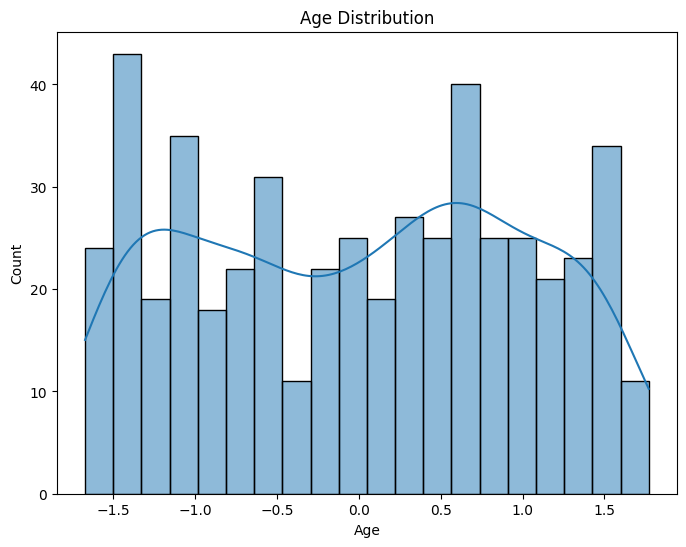

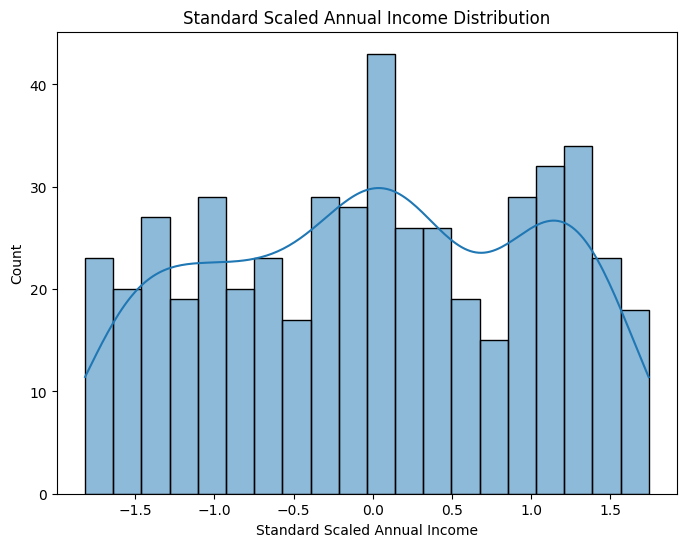

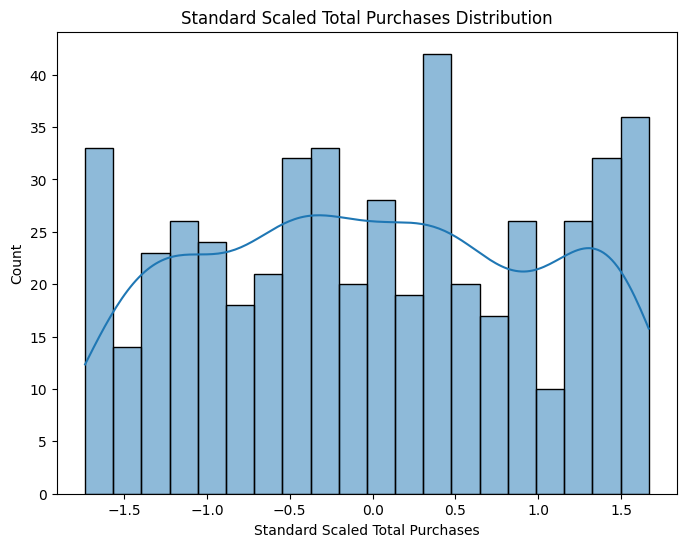

<ipython-input-17-099a8e87118f>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


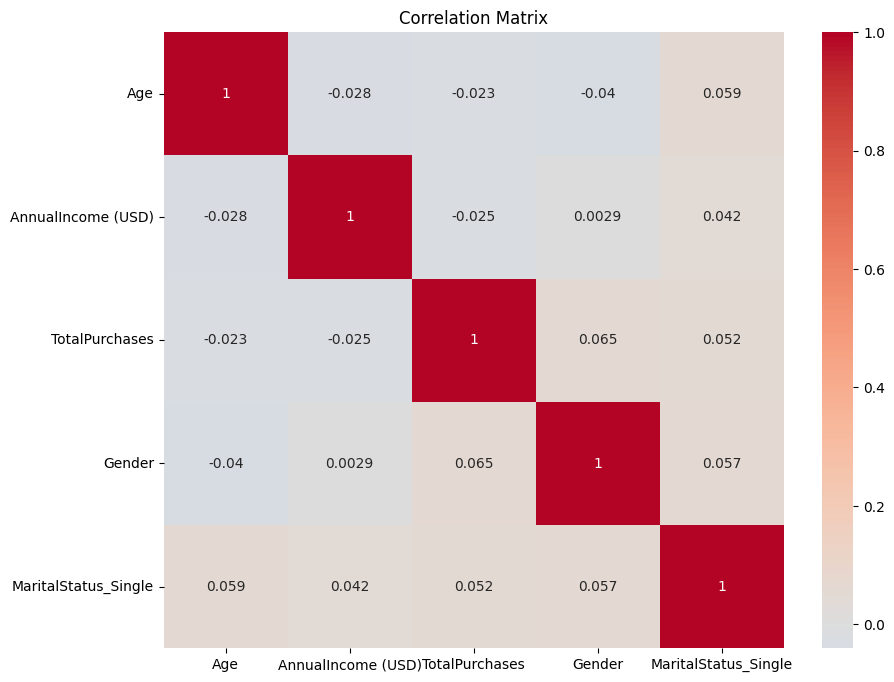

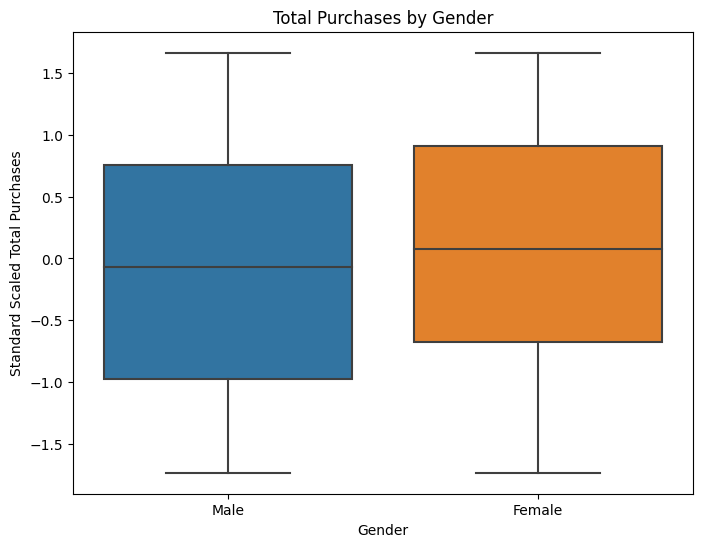

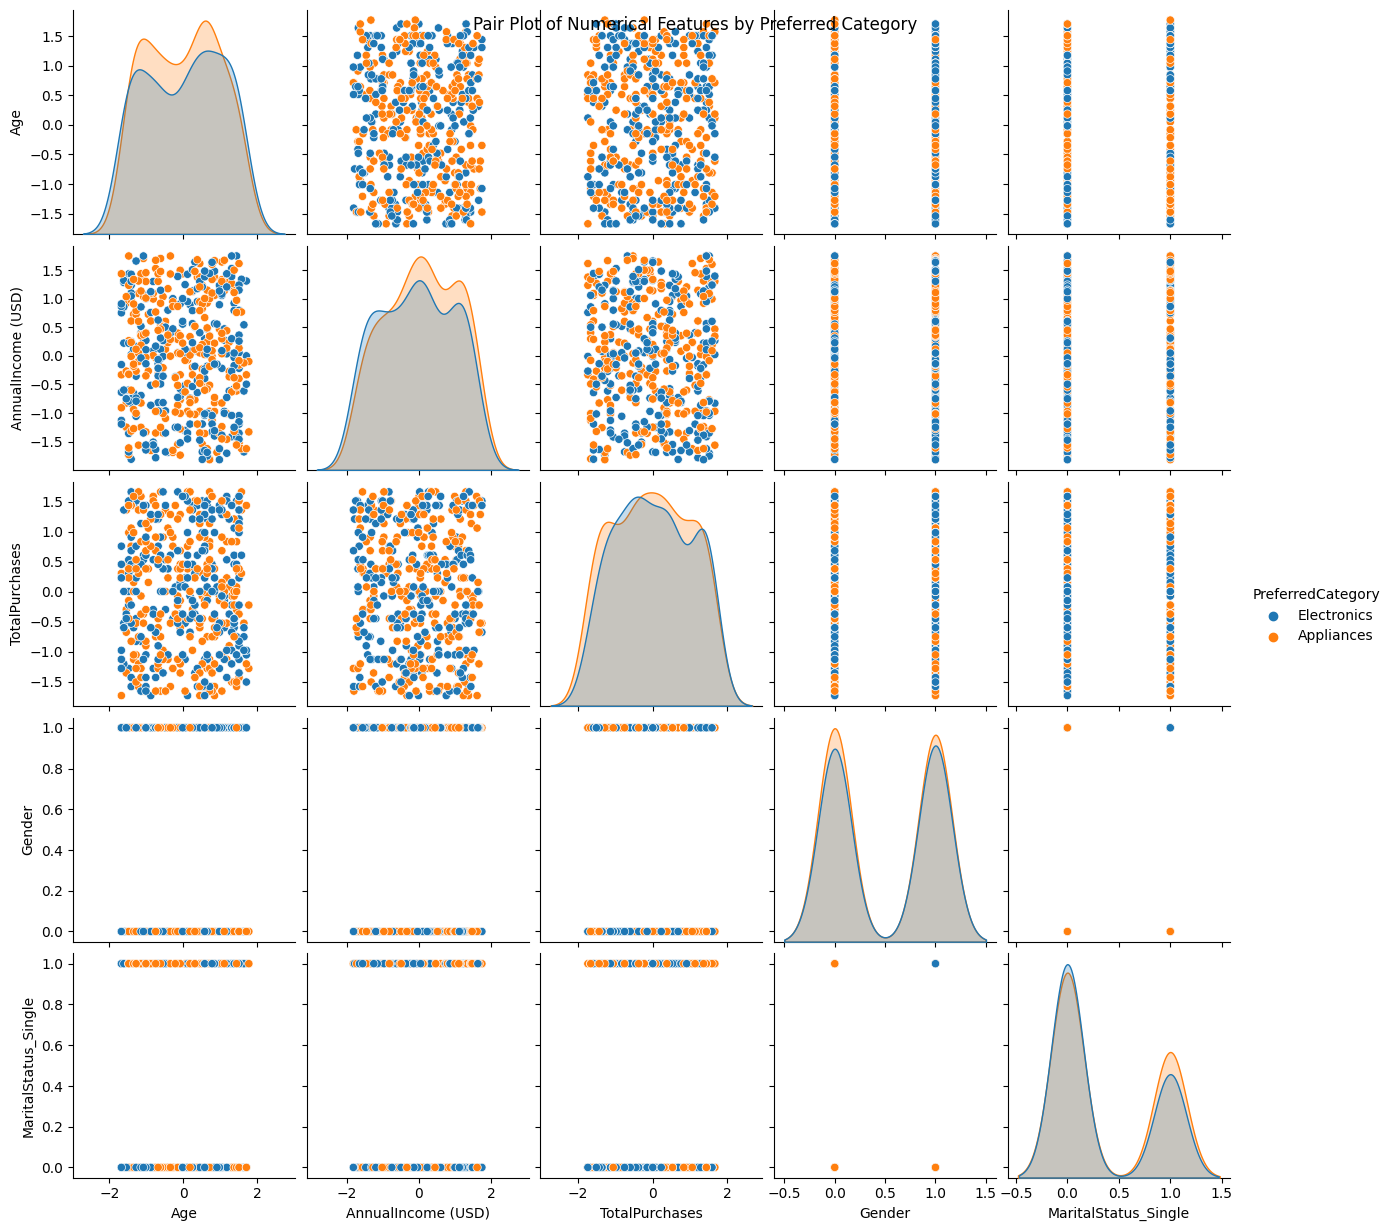

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns


print(df.describe())

# Visualizing Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualizing AnnualIncome distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AnnualIncome (USD)', bins=20, kde=True)
plt.title('Standard Scaled Annual Income Distribution')
plt.xlabel('Standard Scaled Annual Income')
plt.ylabel('Count')
plt.show()

# Visualizing TotalPurchases distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='TotalPurchases', bins=20, kde=True)
plt.title('Standard Scaled Total Purchases Distribution')
plt.xlabel('Standard Scaled Total Purchases')
plt.ylabel('Count')
plt.show()

# VisualizING the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# VisualizING box plots of TotalPurchases by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='TotalPurchases')
plt.title('Total Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Standard Scaled Total Purchases')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

# Visualizing pair plots of numerical features
sns.pairplot(df, hue='PreferredCategory')
plt.suptitle('Pair Plot of Numerical Features by Preferred Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

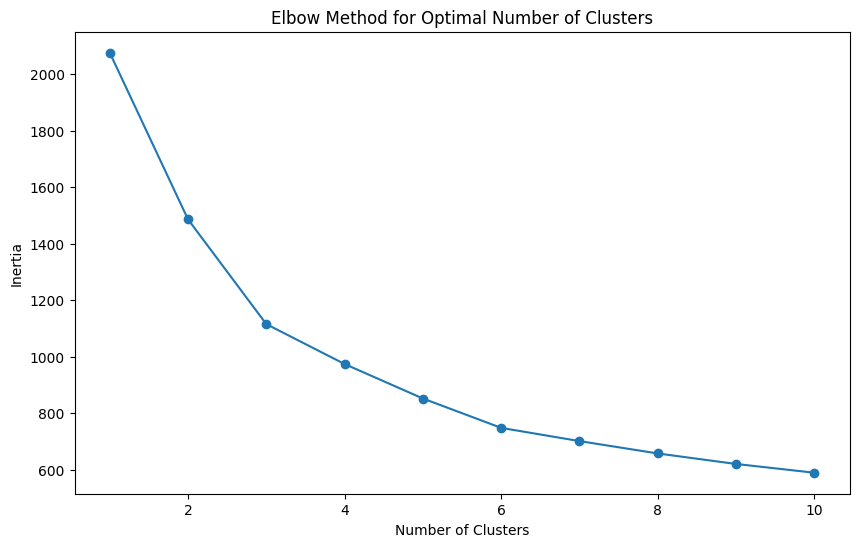

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


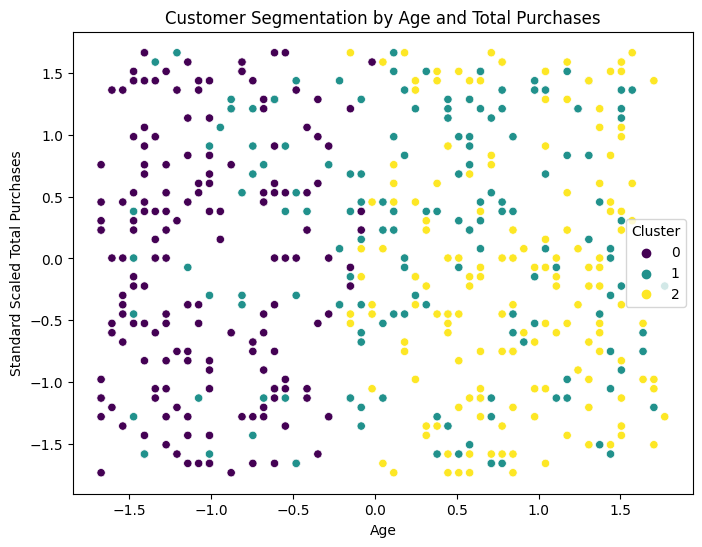

Cluster Centers:
         Age  AnnualIncome (USD)  TotalPurchases    Gender  \
0 -1.029239            0.354911        0.001366  0.553073   
1  0.305988           -1.112804        0.130431  0.503145   
2  0.836923            0.700042       -0.129525  0.432099   

   MaritalStatus_Single  Cluster  
0              0.374302        0  
1              0.345912        1  
2              0.339506        2  


In [20]:
from sklearn.cluster import KMeans


# Dropping the 'PreferredCategory' column as it's the target variable
X = df.drop('PreferredCategory', axis=1)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# we will choose 3 as the optimal number of clusters
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize cluster distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='TotalPurchases', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation by Age and Total Purchases')
plt.xlabel('Age')
plt.ylabel('Standard Scaled Total Purchases')
plt.legend(title='Cluster')
plt.show()

# Visualize cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
cluster_centers['Cluster'] = range(n_clusters)
print("Cluster Centers:\n", cluster_centers)

Key Findings:
1. The gender shows almost same diversity between male and female, giving a minor difference of 2 percent.
2. Furthermore, gender and total purchases are comparatively highly corelated.
3. The annual income shows a bit of normal distribution after being standard scaled.
4. The age distribution has a diversity and not a specific age bracket is more recognizable as a customer.
5. Married people are more preffered to buy electronics.